torch.Size([3, 1080, 1920])


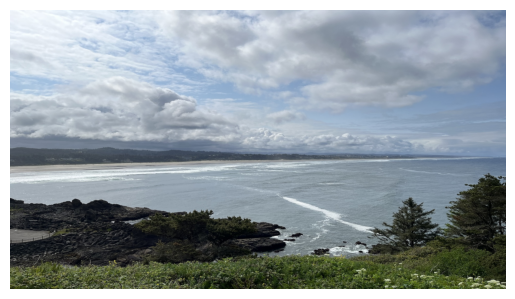

In [1]:
import torch
from torchvision.io import decode_image,read_image
from torchvision import transforms
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
def show_image(image):
    # plt.imshow(transforms.ToPILImage()(image), interpolation="bicubic")
    # # pil_image = transforms.ToPILImage()(image)
    # # pil_image.show()
    plt.imshow(image.detach().permute(1, 2, 0).cpu())
    plt.axis('off')
    plt.show()

# img = decode_image('coast.jpeg', mode='RGB')
# img = img.to(torch.float32) / 255.0

pil_img = Image.open('coast.jpeg')
img = F.to_tensor(pil_img)
print(img.shape)
show_image(img)

In [7]:
%reload_ext autoreload
%autoreload 2

from transformer_net import *


device = torch.device('cpu')
# scripted_model = torch.jit.load('../style-transfer/models/exports/cpu/mosaic_float16.pt', map_location=device)
# ts_state = scripted_model.state_dict()
# for k, v in ts_state.items():
#     if v.dtype == torch.float16:
#         ts_state[k] = v.float()

# model = TransformerNet()
# model.load_state_dict(ts_state)
# stm = model.to(device)
stm = torch.jit.load('../style-transfer/models/exports/cpu/mosaic_float16.pt', map_location=device)


In [10]:
stm.to(device)
stm.to(torch.float32)
stm.eval()
# stm = torch.jit.optimize_for_inference(stm)
img.unsqueeze(0).shape

torch.Size([1, 3, 1080, 1920])

torch.Size([1, 3, 1000, 1000])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6431267..1.437112].


torch.Size([1, 3, 1000, 1000])


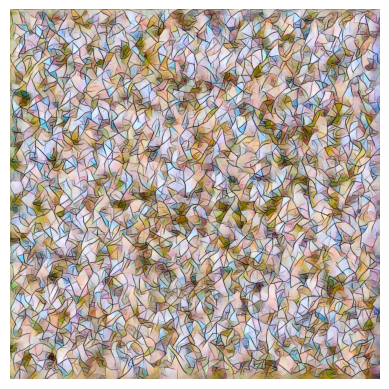

In [11]:
x = torch.randn(torch.Size([1, 3, 1000, 1000])).to(torch.float32)
print(x.shape)
# show_image(x.squeeze(0))
y = stm(x)
print(y.shape)
show_image((y.squeeze(0) / 255.0).to(torch.float32))

In [5]:
stm.to(device)
stm.eval()
print("Model loaded.")
# help(stm)

Model loaded.


torch.Size([3, 1080, 1920])


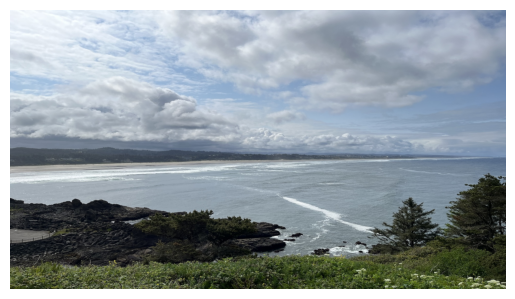

In [6]:
in_img = img.to(device).to(torch.float32).unsqueeze(0).contiguous()
in_img.shape
x = in_img.squeeze(0).to(torch.float32)
print(x.shape)
show_image(x)


In [ ]:
output = stm(in_img).detach()
print(output.shape,output.dtype,output.device)
torch.mps.empty_cache()

In [ ]:
out_img = (output.squeeze(0) / 255.0).to(torch.float32)
print(out_img.shape)
show_image(out_img)